In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:
dirs = os.listdir('website_results')
dirs.remove('.DS_Store')
dirs

['CrossWeigh', 'AutoPhrase', 'LM-LSTM-CRF', 'AutoNER', 'SetExpan']

In [3]:
autophrase = {}
autophrase_stats = pd.DataFrame()
for directory in dirs:
    fp = 'website_results/' + directory + '/AutoPhrase.txt'
    df = pd.read_csv(fp, delimiter='\t', header=None, names=['score', 'phrase'])
    df = df[df['score'] >= 0.5]
    autophrase[directory] = df
    autophrase_stats[directory] = df['score'].describe()
autophrase_df = pd.concat(autophrase, axis=1)
autophrase_df

CrossWeigh                              AutoPhrase  \
         score                       phrase      score   
0     0.953615             maccabi tel aviv   0.900436   
1     0.947004             hapoel jerusalem   0.898069   
2     0.876014  natural language processing   0.863229   
3     0.853902                 tel aviv org   0.845831   
4     0.836071                lstm cnns crf   0.830262   
..         ...                          ...        ...   
234        NaN                          NaN   0.502536   
235        NaN                          NaN   0.501351   
236        NaN                          NaN   0.501351   
237        NaN                          NaN   0.501351   
238        NaN                          NaN   0.500357   

                            LM-LSTM-CRF                    AutoNER  \
                     phrase       score           phrase     score   
0    information extraction      0.9455  neural networks  0.883683   
1            knowledge base      0.8955      conll03 ner  0.838017   
2           domain specific      0.8715   highway layers  0.831583   
3              text corpora      0.8135   language model  0.826750   
4      high quality phrases      0.8105      pos tagging  0.797167   
..                      ...         ...              ...       ...   
234                   works         NaN              NaN       NaN   
235              classifier         NaN              NaN       NaN   
236                previous         NaN              NaN       NaN   
237                  papers         NaN              NaN       NaN   
238                accuracy         NaN              NaN       NaN   

                                                SetExpan                    
                                        phrase     score            phrase  
0                                   jiawei han  0.861667   bipartite graph  
1    association for computational linguistics  0.810833        data model  
2                                      test f1  0.803333  entity intrusion  
3                             natural language  0.740667    semantic drift  
4                                    xiang ren  0.731913        california  
..                                         ...       ...               ...  
234                                        NaN       NaN               NaN  
235                                        NaN       NaN               NaN  
236                                        NaN       NaN               NaN  
237                                        NaN       NaN               NaN  
238                                        NaN       NaN               NaN  

[239 rows x 10 columns]

In [4]:
autophrase_stats

,CrossWeigh,AutoPhrase,LM-LSTM-CRF,AutoNER,SetExpan
count,169.000000,239.000000,206.000000,188.000000,227.000000
mean,0.593359,0.617991,0.593708,0.582989,0.583672
std,0.078843,0.081941,0.075187,0.071382,0.064126
min,0.512647,0.500357,0.501500,0.501507,0.500333
25%,0.546865,0.561138,0.541750,0.524618,0.534664
50%,0.561762,0.599198,0.567766,0.565733,0.557167
75%,0.621572,0.664706,0.627079,0.617327,0.623755
max,0.953615,0.900436,0.945500,0.883683,0.861667


In [5]:
weighted = {}
weighted_stats = pd.DataFrame()
for directory in dirs:
    if directory != '.DS_Store':
        fp = 'website_results/' + directory + '/weighted_AutoPhrase.csv'
        df = pd.read_csv(fp, index_col='Unnamed: 0')
        df = df[df['score'] >= 0.5]
        weighted[directory] = df
        weighted_stats[directory] = df['score'].describe()
weighted_df = pd.concat(weighted, axis=1)
weighted_df

CrossWeigh                         AutoPhrase            \
                         phrase     score                   phrase     score   
0   natural language processing  0.838990           knowledge base  0.873407   
1              natural language  0.757931   information extraction  0.856859   
2     computational linguistics  0.740970          domain specific  0.811338   
3              cross validation  0.718658             text corpora  0.770488   
4      named entity recognition  0.705910     keyphrase extraction  0.719894   
5                   pos tagging  0.696215               pos tagger  0.712723   
6                      lstm crf  0.606123         natural language  0.690965   
7                       chicago  0.593747     massive text corpora  0.650525   
8                         japan  0.571026                       cn  0.630996   
9                            f1  0.537041                      auc  0.630004   
10                        china  0.530006                  pos tag  0.625162   
11                           nz  0.524289                     ieee  0.618373   
12                          loc  0.509845                wikipedia  0.609086   
13                           mi  0.500274                 illinois  0.604065   
14                          NaN       NaN           domain experts  0.594662   
15                          NaN       NaN            phrase mining  0.594116   
16                          NaN       NaN                 pos tags  0.592651   
17                          NaN       NaN                  chinese  0.592007   
18                          NaN       NaN         precision recall  0.584770   
19                          NaN       NaN             high quality  0.582018   
20                          NaN       NaN                      fig  0.574806   
21                          NaN       NaN            word sequence  0.568036   
22                          NaN       NaN                      pos  0.567650   
23                          NaN       NaN              pre trained  0.567236   
24                          NaN       NaN        wikipedia article  0.559930   
25                          NaN       NaN                  english  0.557935   
26                          NaN       NaN                      art  0.553188   
27                          NaN       NaN                       np  0.550633   
28                          NaN       NaN  precision recall curves  0.550550   
29                          NaN       NaN       multiple languages  0.546520   
30                          NaN       NaN                      acm  0.543302   
31                          NaN       NaN                     yelp  0.532350   
32                          NaN       NaN            quality score  0.529173   
33                          NaN       NaN                       gb  0.525003   
34                          NaN       NaN                  viterbi  0.523229   
35                          NaN       NaN                 business  0.521393   
36                          NaN       NaN                     dblp  0.520744   
37                          NaN       NaN                     proc  0.517485   
38                          NaN       NaN                      phd  0.516406   
39                          NaN       NaN                  section  0.515960   
40                          NaN       NaN                  spanish  0.515055   
41                          NaN       NaN              linguistics  0.511794   
42                          NaN       NaN                rectified  0.511514   
43                          NaN       NaN                      han  0.510894   
44                          NaN       NaN             human effort  0.510888   
45                          NaN       NaN          knowledge bases  0.508155   
46                          NaN       NaN         human annotation  0.506032   
47                          NaN       NaN                      idf  0.505692   
48                   

In [6]:
weighted_stats

,CrossWeigh,AutoPhrase,LM-LSTM-CRF,AutoNER,SetExpan
count,14.000000,50.000000,27.000000,12.000000,27.000000
mean,0.630787,0.585353,0.619926,0.596275,0.574342
std,0.109825,0.090859,0.089126,0.095224,0.067467
min,0.500274,0.500690,0.505850,0.505426,0.502293
25%,0.531765,0.518300,0.553823,0.516631,0.530156
50%,0.599935,0.558933,0.594081,0.570894,0.561447
75%,0.715471,0.607831,0.683004,0.639069,0.604325
max,0.838990,0.873407,0.854883,0.790789,0.829287


In [7]:
weighted_df.head(10)

CrossWeigh                        AutoPhrase            \
                        phrase     score                  phrase     score   
0  natural language processing  0.838990          knowledge base  0.873407   
1             natural language  0.757931  information extraction  0.856859   
2    computational linguistics  0.740970         domain specific  0.811338   
3             cross validation  0.718658            text corpora  0.770488   
4     named entity recognition  0.705910    keyphrase extraction  0.719894   
5                  pos tagging  0.696215              pos tagger  0.712723   
6                     lstm crf  0.606123        natural language  0.690965   
7                      chicago  0.593747    massive text corpora  0.650525   
8                        japan  0.571026                      cn  0.630996   
9                           f1  0.537041                     auc  0.630004   

          LM-LSTM-CRF                         AutoNER            \
               phrase     score                phrase     score   
0     neural networks  0.854883      natural language  0.790789   
1         pos tagging  0.786385       domain specific  0.741383   
2             bi lstm  0.732485          named entity  0.673549   
3   sequence labeling  0.732107   distant supervision  0.627576   
4      word embedding  0.714797              lstm crf  0.597881   
5   transfer learning  0.703784  ablation experiments  0.580176   
6      language model  0.698183  distantly supervised  0.561613   
7     word embeddings  0.667826                  ncbi  0.536222   
8            lstm crf  0.638850                   ner  0.516699   
9  conditional random  0.630958                   ram  0.516429   

          SetExpan            
            phrase     score  
0  bipartite graph  0.829287  
1        skip gram  0.664785  
2     ranked lists  0.644381  
3   semantic drift  0.628639  
4     text corpora  0.609257  
5            texas  0.608994  
6   coarse grained  0.607136  
7       california  0.601513  
8       skip grams  0.600160  
9      ranked list  0.590317

In [8]:
annote_stats = pd.DataFrame(columns=['article', 
                                     'accuracy (quality score > 0.5)', 
                                     'accuracy (quality score > 0.6)', 
                                     'accuracy (quality score > 0.7)'])
for directory in dirs:
    fp = 'website_results/' + directory + '/annotation.csv'
    df = pd.read_csv(fp, index_col='Unnamed: 0')
    df2 = df[df['score'] > 0.6]
    df3 = df[df['score'] > 0.7]
    annote_stats = annote_stats.append({'article': directory, 
                                        'accuracy (quality score > 0.5)': df['label'].mean(), 
                                        'accuracy (quality score > 0.6)': df2['label'].mean(),
                                        'accuracy (quality score > 0.7)': df3['label'].mean()}, ignore_index=True)
annote_stats

,article,accuracy (quality score > 0.5),accuracy (quality score > 0.6),accuracy (quality score > 0.7)
0,CrossWeigh,0.642857,1.000000,1.0
1,AutoPhrase,0.780000,0.857143,1.0
2,LM-LSTM-CRF,0.888889,0.923077,1.0
3,AutoNER,0.833333,1.000000,1.0
4,SetExpan,0.629630,0.888889,1.0


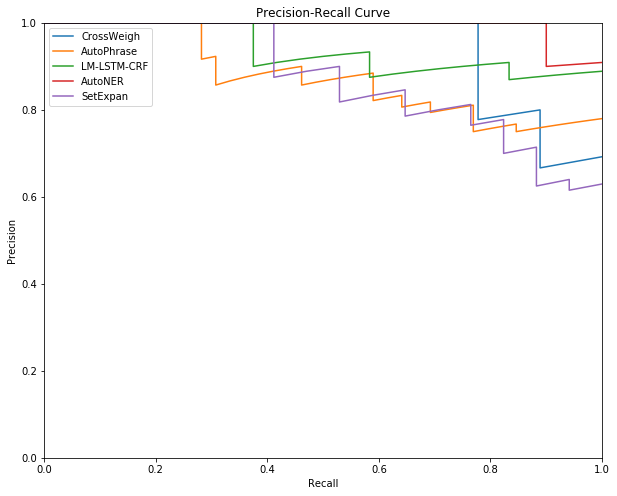

In [9]:
plt.figure(figsize=(10, 8))

for directory in dirs:
    fp = 'website_results/' + directory + '/annotation.csv'
    sample = pd.read_csv(fp, index_col='Unnamed: 0')
    precision, recall, thresholds = precision_recall_curve(
        y_true=sample['label'],
        probas_pred=sample['score']
    )
    plt.plot(recall, precision, scalex=False, scaley=False, label=directory)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.title('Precision-Recall Curve')
plt.show()